In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/medical_conditions_dataset.csv")
df.head(10)

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic
5,6,User0006,40.0,male,Non-Smoker,33.840723,NaN,NaN,Diabetic
6,7,User0007,49.0,male,Smoker,NaN,NaN,153.151126,Cancer
7,8,User0008,47.0,male,Non-Smoker,NaN,115.826322,199.339699,Diabetic
8,9,User0009,NaN,male,Non-Smoker,39.649679,NaN,NaN,Diabetic
9,10,User0010,65.0,male,Smoker,NaN,NaN,NaN,Diabetic


#Applying lebel encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
categorical_cols = ['condition', 'gender', 'smoking_status']

# Create a LabelEncoder object for each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for later use

In [ ]:
df.head(10)

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,50.0,1,0,NaN,NaN,NaN,2
1,2,User0002,30.0,1,0,NaN,105.315064,NaN,1
2,3,User0003,18.0,1,0,35.612486,NaN,NaN,2
3,4,User0004,38.0,1,0,NaN,99.119829,NaN,2
4,5,User0005,76.0,1,0,NaN,NaN,NaN,1
5,6,User0006,40.0,1,0,33.840723,NaN,NaN,1
6,7,User0007,49.0,1,1,NaN,NaN,153.151126,0
7,8,User0008,47.0,1,0,NaN,115.826322,199.339699,1
8,9,User0009,45.0,1,0,39.649679,NaN,NaN,1
9,10,User0010,65.0,1,1,NaN,NaN,NaN,1


# Null value

In [ ]:
df.isnull().sum()

,0
id,0
full_name,0
age,4555
gender,0
smoking_status,0
bmi,5348
blood_pressure,6234
glucose_levels,5244
condition,0


#replacing NULL value

In [ ]:
df = df.drop('full_name', axis=1)
df = df.drop('id', axis=1)
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#Null value replaced with mean value

In [ ]:
df_imputed.isnull().sum()
df=df_imputed

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
smoking_status,0
bmi,0
blood_pressure,0
glucose_levels,0
condition,0


# Split

In [ ]:
from sklearn.model_selection import train_test_split as split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

x = df.drop("condition", axis=1)
y = df.condition
x_train, x_test, y_train, y_test = split(x, y, test_size=0.20, random_state=1)


print(f"Original data has total {x_train.shape[0]+x_test.shape[0]} datas, {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")


Original data has total 10000 datas, 8000 train data and 2000 test data



Text(0, 0.5, '')

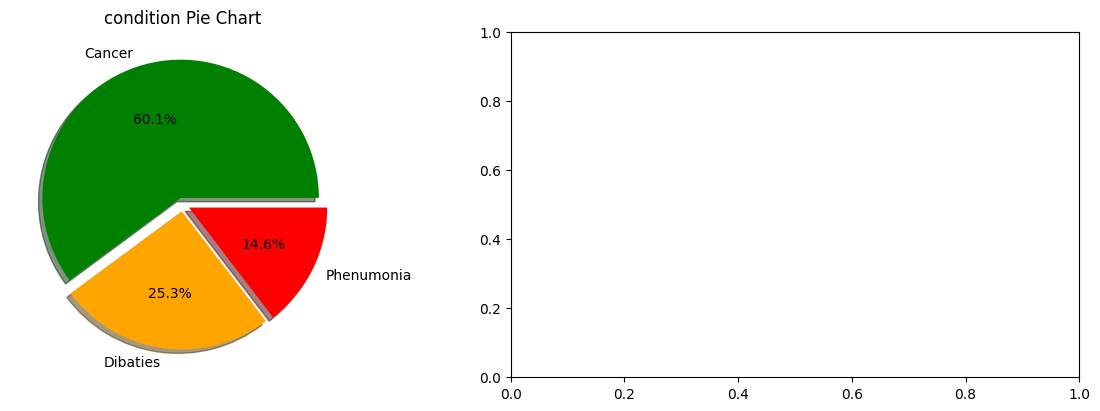

In [ ]:
!pip install matplotlib seaborn  # Install necessary libraries.
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib.
import seaborn as sns # Import the seaborn library.


p_colors = ['green', 'orange', 'red']
risk_order = ["Cancer", "Dibaties", "Phenumonia"]

# Adjust the layout to prevent overlapping
fig, ax = plt.subplots(1, 2, figsize=(12, 4), layout="constrained") # Use layout="constrained"

# Pie Chart
df["condition"].value_counts().plot(kind="pie", labels=risk_order,
        colors=p_colors,explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("condition Pie Chart")
ax[0].set_ylabel('')





# outlier

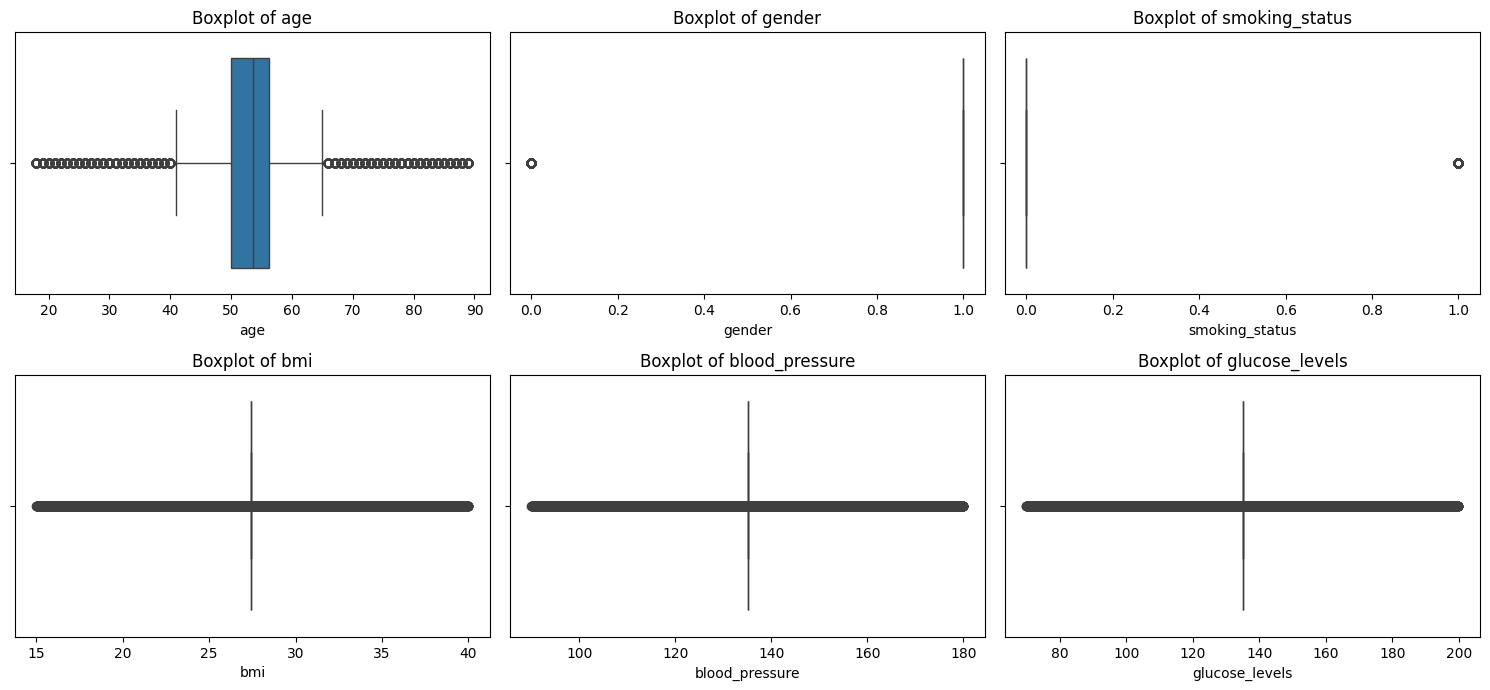

In [ ]:

plt.figure(figsize=(15, 10))

for i, col in enumerate(x.columns, 1):
    if col == 'Unnamed: 32':
        continue
    plt.subplot(len(x.columns) // 3 + 1, 3, i)
    sns.boxplot(x=x[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

#column that has outlier

In [ ]:
import numpy as np
import pandas as pd

# Define a function to detect outliers using the IQR method
def detect_outliers(df):
    outlier_columns = []
    for col in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if there are any outliers in the column
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)

    return outlier_columns

# Detect which columns in X have outliers
columns_with_outliers = detect_outliers(x)

print("Columns with outliers:", columns_with_outliers)

# /*Explanation:
# Q1 and Q3: The 25th and 75th percentiles of the data, respectively.
# IQR (Interquartile Range): The difference between Q3 and Q1.
# Outlier Range: Any value less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR is considered an outlier.
# Loop: The function loops through each feature in the dataframe and checks if any values fall outside this range.
# Result: The function returns a list of column names that contain outliers.
# *\

Columns with outliers: ['age', 'gender', 'smoking_status', 'bmi', 'blood_pressure', 'glucose_levels']


In [ ]:
import pandas as pd

# Function to count outliers using IQR
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers in the column
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

    # Convert the dictionary to a pandas DataFrame for better visualization
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    return outlier_counts_df.sort_values(by='Outlier Count', ascending=False)

# Get the outlier counts for each column
outlier_counts_df = count_outliers(x)

# Display the columns with the most outliers
print(outlier_counts_df)


           Column  Outlier Count
5  glucose_levels           4756
3             bmi           4652
4  blood_pressure           3766
0             age           3577
1          gender           1494
2  smoking_status            986


#removing outlier

In [ ]:
# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Cap outliers in X
X = cap_outliers(x, columns_with_outliers)


# Smote

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# # Dropping the target variable and splitting the data
X = df.drop("condition", axis=1)
y = df["condition"]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Now you can continue with training your model using x_train_smote and y_train_smote
print(f"Original class distribution: {y_train.value_counts()}")
print(f"Class distribution after SMOTE: {y_train_smote.value_counts()}")

Original class distribution: condition
1.0    4803
2.0    2021
0.0    1176
Name: count, dtype: int64
Class distribution after SMOTE: condition
1.0    4803
2.0    4803
0.0    4803
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# # Dropping the target variable and splitting the data
# X = df.drop("RiskLevel", axis=1)
# y = df["RiskLevel"]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)



In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

#RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampler to the training data
ros = RandomOverSampler(random_state=1)
x_train_smote, y_train_smote = ros.fit_resample(x_train, y_train)


#SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek to the training data
smote_tomek = SMOTETomek(random_state=1)
x_train_smote, y_train_smote = smote_tomek.fit_resample(x_train, y_train)


#ADAsyn

In [ ]:
# Apply ADASYN to the training data
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=1)
x_train_smote, y_train_smote = adasyn.fit_resample(x_train, y_train)

Dicision tree

In [ ]:
# Using original dataset
rf = DecisionTreeClassifier(random_state=10)
rf.fit(x_train, y_train)
y_pred_dt = rf.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_dt)}")

Test Accuracy: 0.4635


#random forest

In [ ]:
rf = RandomForestClassifier(random_state=50)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Test Accuracy: 0.525


#SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=50) # Initialize the SVC model with random_state for reproducibility
svm.fit(x_train, y_train) # Fit the model to the training data
y_pred_svm = svm.predict(x_test) # Predict on the test data
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_svm)}") # Evaluate the accuracy and print it

Test Accuracy: 0.605


#EXtratree clasifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=50)
etc.fit(x_train, y_train)
y_pred_etc = etc.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_etc)}")

Test Accuracy: 0.501


#XGBoost

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 10)
model.fit(x_train_smote, y_train_smote)
y_pred_xgb = model.predict(x_test)
result_train = model.score(x_train, y_train)
print("Accuracy : {}".format(result_train))

Accuracy : 0.375875


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # You can adjust the number of neighbors
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_knn)}")

Test Accuracy: 0.4305


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.19      0.08      0.11       284
         1.0       0.60      0.79      0.68      1210
         2.0       0.25      0.14      0.18       506

    accuracy                           0.53      2000
   macro avg       0.34      0.34      0.32      2000
weighted avg       0.45      0.53      0.47      2000



#Feature Importance

          Feature  Importance
5  glucose_levels    0.289226
3             bmi    0.284882
4  blood_pressure    0.223504
0             age    0.175081
1          gender    0.015713
2  smoking_status    0.011593


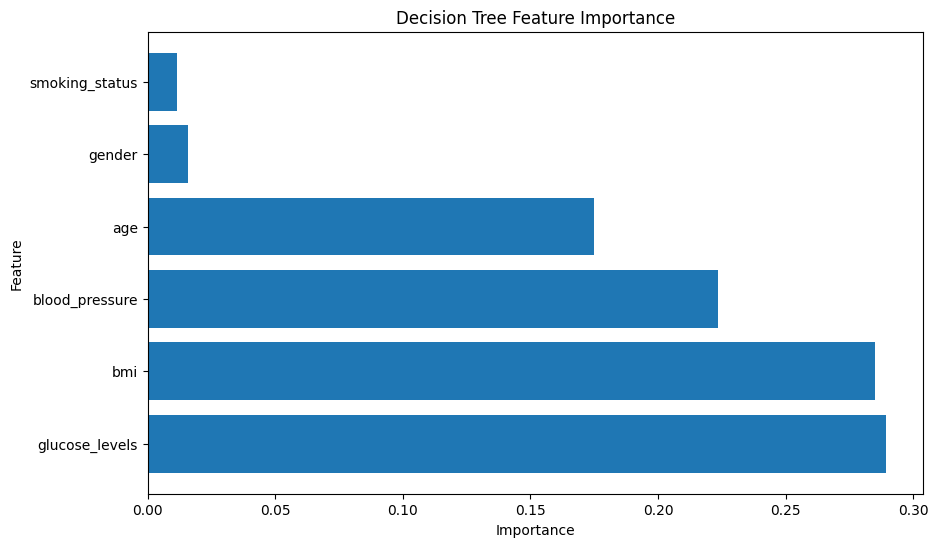

In [ ]:
# Assuming you have already trained your Decision Tree model as 'rf_decision_tree'
importances = rf.feature_importances_
feature_names = X.columns  # Assuming X is your feature DataFrame

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

# Optionally, you can plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

#ROC Curve

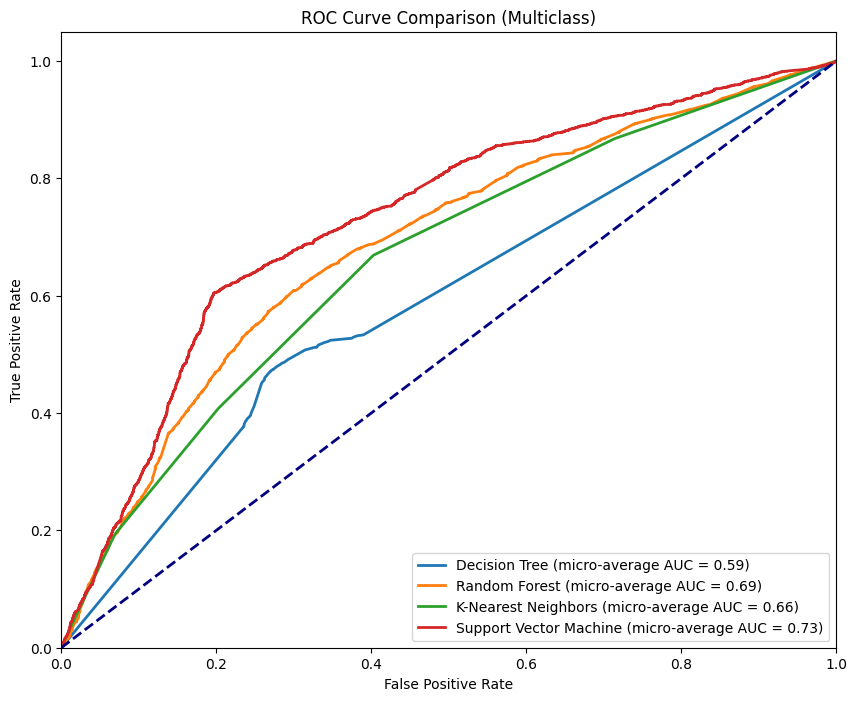

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Assuming x_train, x_test, y_train, y_test are already defined

# Binarize the output (convert to one-hot encoding)
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_train_bin.shape[1]

# Initialize models (using OneVsRestClassifier for multiclass)
models = {
    "Decision Tree": OneVsRestClassifier(DecisionTreeClassifier(random_state=50)),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier(random_state=50)),
    "K-Nearest Neighbors": OneVsRestClassifier(KNeighborsClassifier()),
    "Support Vector Machine": OneVsRestClassifier(SVC(probability=True, random_state=50)),
}

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(x_train, y_train_bin)
    y_score = model.predict_proba(x_test)  # Get probabilities for all classes

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot average ROC curve (micro-average)
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.plot(fpr["micro"], tpr["micro"], lw=2, label=f"{name} (micro-average AUC = {roc_auc['micro']:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Multiclass)")
plt.legend(loc="lower right")
plt.show()

#ANOVA

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier # You can change to any model
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampler to the training data
ros = RandomOverSampler(random_state=1)
x_train_smote, y_train_smote = ros.fit_resample(x_train, y_train)

# Create a SelectKBest object
selector = SelectKBest(f_classif, k=3)  # Select top 5 features

# Fit the selector to the SMOTE-resampled data
X_new = selector.fit_transform(x_train_smote, y_train_smote)

# Get the selected feature indices and names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Transform the original training and testing data
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

# Train a Decision Tree model on the selected features
decision_tree = DecisionTreeClassifier(random_state=50) # You can change to any model
decision_tree.fit(x_train_selected, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(x_test_selected)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after applying ANOVA feature selection: {accuracy * 100:.2f}%")

Accuracy after applying ANOVA feature selection: 51.05%


#PCA feature selection

In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier  # You can change to any model
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampler to the training data
ros = RandomOverSampler(random_state=1)
x_train_smote, y_train_smote = ros.fit_resample(x_train, y_train)

# Create a PCA object
pca = PCA(n_components=3)  # Select top 5 principal components

# Fit the PCA object to the SMOTE-resampled data
X_new = pca.fit_transform(x_train_smote)

# Transform the original training and testing data
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# Train a Decision Tree model on the selected features
decision_tree = DecisionTreeClassifier(random_state=50)  # You can change to any model
decision_tree.fit(x_train_pca, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(x_test_pca)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after applying PCA feature selection: {accuracy * 100:.2f}%")

Accuracy after applying PCA feature selection: 46.60%


#RFE feature selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier  # You can change to any model
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampler to the training data
ros = RandomOverSampler(random_state=1)
x_train_smote, y_train_smote = ros.fit_resample(x_train, y_train)

# Create the base estimator (e.g., Decision Tree)
estimator = DecisionTreeClassifier(random_state=50)

# Create the RFE object
selector = RFE(estimator, n_features_to_select=4, step=1)  # Select top 5 features

# Fit the RFE object to the SMOTE-resampled data
selector = selector.fit(x_train_smote, y_train_smote)

# Transform the original training and testing data
x_train_rfe = selector.transform(x_train)
x_test_rfe = selector.transform(x_test)

# Train a Decision Tree model on the selected features
decision_tree = DecisionTreeClassifier(random_state=50)  # You can change to any model
decision_tree.fit(x_train_rfe, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(x_test_rfe)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after applying RFE feature selection: {accuracy * 100:.2f}%")

Accuracy after applying RFE feature selection: 46.75%


#hyperparameter tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler


# Split data
X = df.drop("condition", axis=1)
y = df["condition"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Apply Random Oversampler to the training data
ros = RandomOverSampler(random_state=1)
x_train_smote, y_train_smote = ros.fit_resample(x_train, y_train)

# ANOVA feature selection
selector = SelectKBest(f_classif, k=5)  # Select top 5 features
X_new = selector.fit_transform(x_train_smote, y_train_smote)
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=50), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_selected, y_train)  # Fit on selected features

# Get the best model and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy after Tuning:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy after Tuning: 0.604


#ensembling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Split data
X = df.drop("condition", axis=1)
y = df["condition"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Create individual models (You can use your tuned models here if you have them)
dt_model = DecisionTreeClassifier(random_state=50)
rf_model = RandomForestClassifier(random_state=50)

# Create VotingClassifier with hard voting
ensemble_hard = VotingClassifier(estimators=[('dt', dt_model), ('rf', rf_model)], voting='hard')

# Create VotingClassifier with soft voting
ensemble_soft = VotingClassifier(estimators=[('dt', dt_model), ('rf', rf_model)], voting='soft')

# Train and evaluate both ensembles
for ensemble, voting_type in [(ensemble_hard, 'hard'), (ensemble_soft, 'soft')]:
    ensemble.fit(x_train, y_train)
    y_pred = ensemble.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Ensemble Model Accuracy ({voting_type} voting): {accuracy * 100:.2f}%")

Ensemble Model Accuracy (hard voting): 51.10%
Ensemble Model Accuracy (soft voting): 46.55%


# Test Accoracy

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(x_train_smote, y_train_smote)


x_test = imputer.transform(x_test)

y_pred_dt = dt_model.predict(x_test)

print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(x_test)

print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- condition


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_true_positives_true_negatives_multiple_models(results):
    """Plots a bar chart showing True Positives and True Negatives for multiple models.

    Args:
        results: A dictionary where keys are model names and values are tuples of (y_true, y_pred).
    """

    model_names = list(results.keys())
    TP_values = []
    TN_values = []

    for model_name, (y_true, y_pred) in results.items():
        TP = np.sum((y_true == 1) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        TP_values.append(TP)
        TN_values.append(TN)

    # Create the bar chart
    width = 0.35  # Width of the bars
    x = np.arange(len(model_names))

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, TP_values, width, label='True Positives', color='green')
    rects2 = ax.bar(x + width/2, TN_values, width, label='True Negatives', color='red')

    # Add labels, title, and legend
    ax.set_ylabel('Count')
    ax.set_title('True Positives and True Negatives for Multiple Models')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right')  # Rotate x-axis labels for better readability
    ax.legend()

    # Add labels on top of the bars
    for rect in rects1 + rects2:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height),
                ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()


# Example usage:
results = {
    'Decision Tree': (y_test, y_pred_dt),  # Replace with your actual variables
    'Random Forest': (y_test, y_pred_rf),
    'SVM': (y_test, y_pred_svm),
    'KNN': (y_test, y_pred_knn),
    'Extra Tree Classifier': (y_test, y_pred_etc),
    'XGB Boost': (y_test, y_pred_xgb),
}

plot_true_positives_true_negatives_multiple_models(results)

# Decision tree

In [ ]:
# Decision tree
rf_decision_tree = DecisionTreeClassifier(random_state=50)
rf_decision_tree.fit(x_train, y_train)
y_pred = rf_decision_tree.predict(x_test)
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred)*100}%")

# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_random_forest = RandomForestClassifier(random_state=50)
rf_random_forest.fit(x_train, y_train)
y_pred = rf_random_forest.predict(x_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred)*100}%")




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Decision Tree Test Accuracy: 46.0%
Random Forest Test Accuracy: 61.33333333333333%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Confusion matrix

Confusion matrix of decision tree


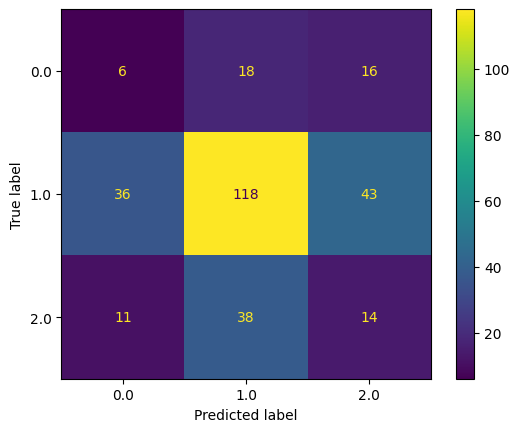

Confusion matrix of Random forest


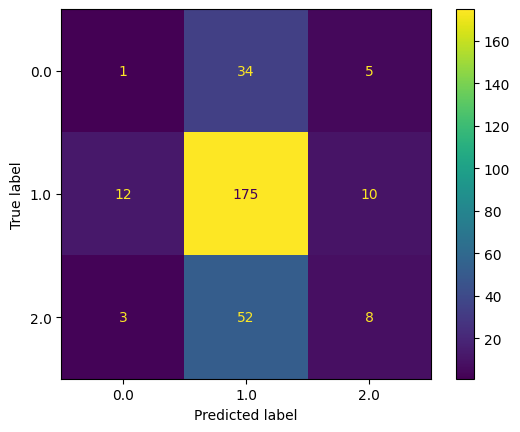

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Confusion matrix of decision tree")
y_pred = rf_decision_tree.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

#  the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_decision_tree.classes_)
disp.plot()
plt.show()



print("Confusion matrix of Random forest")
y_pred = rf_random_forest.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

#  the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_random_forest.classes_)
disp.plot()
plt.show()





# report

In [ ]:
from sklearn.metrics import classification_report

print("Decision tree report")
print(classification_report(y_test, rf_decision_tree.predict(x_test),zero_division=1))
print()
print("Random forest report")
print(classification_report(y_test, rf_random_forest.predict(x_test),zero_division=1))
print()


Decision tree report
              precision    recall  f1-score   support

         0.0       0.11      0.15      0.13        40
         1.0       0.68      0.60      0.64       197
         2.0       0.19      0.22      0.21        63

    accuracy                           0.46       300
   macro avg       0.33      0.32      0.32       300
weighted avg       0.50      0.46      0.48       300


Random forest report
              precision    recall  f1-score   support

         0.0       0.06      0.03      0.04        40
         1.0       0.67      0.89      0.76       197
         2.0       0.35      0.13      0.19        63

    accuracy                           0.61       300
   macro avg       0.36      0.35      0.33       300
weighted avg       0.52      0.61      0.55       300




#accuracy of different model before SMOTE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data
X = df.drop("condition", axis=1)
y = df["condition"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=50),
    "Random Forest": RandomForestClassifier(random_state=50),
    "Support Vector Machine": SVC(random_state=50),
    "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Calculate accuracy for each model
results = []
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append([model_name, accuracy])

# Create and display table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy Before SMOTE"])
results_df.set_index("Model", inplace=True)
display(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy Before SMOTE
Model,
Decision Tree,0.460000
Random Forest,0.613333
Support Vector Machine,0.656667
Logistic Regression,0.656667
K-Nearest Neighbors,0.556667


#implementing Hyperparameter Tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X = df.drop("condition", axis=1)
y = df["condition"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Decision Tree Tuning
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=50), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(x_train, y_train)

print("Best Decision Tree parameters:", dt_grid_search.best_params_)
print("Best Decision Tree accuracy:", dt_grid_search.best_score_)

# Random Forest Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=50), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train, y_train)

print("Best Random Forest parameters:", rf_grid_search.best_params_)
print("Best Random Forest accuracy:", rf_grid_search.best_score_)

Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Decision Tree accuracy: 0.6071792189679219


KeyboardInterrupt: 

#implementing Ensembling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Split data
X = df.drop("condition", axis=1)
y = df["condition"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Create individual models
dt_model = DecisionTreeClassifier(random_state=50)
rf_model = RandomForestClassifier(random_state=50)

# Create VotingClassifier
ensemble_model = VotingClassifier(estimators=[('dt', dt_model), ('rf', rf_model)], voting='hard')

# Train the ensemble model
ensemble_model.fit(x_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")

Ensemble Model Accuracy: 54.00%
